# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # but not all calls return data as OpenWeatherMap will not have have records in all the cities randomly generated by CitiPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found skip to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Gushikawa
Processing Record 2 | Port Alfred
Processing Record 3 | Vaini
Processing Record 4 | Makakilo City
Processing Record 5 | Yellowknife
Processing Record 6 | Labuhan
Processing Record 7 | East London
Processing Record 8 | Pevek
Processing Record 9 | Punta Arenas
Processing Record 10 | Quelimane
Processing Record 11 | Dikson
Processing Record 12 | Busselton
Processing Record 13 | Rikitea
Processing Record 14 | Esperance
Processing Record 15 | Solton
Processing Record 16 | Baruun-Urt
Processing Record 17 | Kuragino
Processing Record 18 | Naze
Processing Record 19 | Dabakala
Processing Record 20 | Bathsheba
Processing Record 21 | Mezen
City not found. Skipping...
Processing Record 22 | Chokurdakh
Processing Record 23 | Nara
Processing Record 24 | Golub-Dobrzyn
Processing Record 25 | Constitucion
Processing Record 26 | Atuona
Processing Record 27 | Bolzano
Processing Record 28 | Komsomolskiy
Processing Rec

Processing Record 225 | San Carlos de Bariloche
Processing Record 226 | Manuk Mangkaw
Processing Record 227 | Westport
Processing Record 228 | Nanhai
Processing Record 229 | Gravelbourg
City not found. Skipping...
Processing Record 230 | Bambous Virieux
Processing Record 231 | Panaba
Processing Record 232 | Laguna
Processing Record 233 | Bay Roberts
Processing Record 234 | Zhireken
Processing Record 235 | Jos
Processing Record 236 | Naifaru
Processing Record 237 | Pacific Grove
City not found. Skipping...
Processing Record 238 | Saint-Georges
Processing Record 239 | Muros
City not found. Skipping...
Processing Record 240 | Coolum Beach
City not found. Skipping...
Processing Record 241 | Alofi
City not found. Skipping...
Processing Record 242 | Luderitz
Processing Record 243 | Kamaishi
Processing Record 244 | Fortuna
Processing Record 245 | Peniche
Processing Record 246 | Norman Wells
Processing Record 247 | Montepuez
Processing Record 248 | East Liverpool
Processing Record 249 | Dubovs

Processing Record 446 | Salmo
Processing Record 447 | Basco
Processing Record 448 | Jasper
Processing Record 449 | Angoche
City not found. Skipping...
Processing Record 450 | Bocas del Toro
Processing Record 451 | Greenville
City not found. Skipping...
Processing Record 452 | Yaransk
City not found. Skipping...
Processing Record 453 | Sungaipenuh
Processing Record 454 | Mumford
Processing Record 455 | Vardo
Processing Record 456 | Kurilsk
Processing Record 457 | Sinnamary
Processing Record 458 | Eenhana
Processing Record 459 | Innisfail
City not found. Skipping...
Processing Record 460 | Pisco
Processing Record 461 | Avera
Processing Record 462 | North Bend
Processing Record 463 | Kahului
Processing Record 464 | Zhicheng
Processing Record 465 | Ilulissat
Processing Record 466 | Kensington
Processing Record 467 | Cap Malheureux
Processing Record 468 | Puerto Colombia
Processing Record 469 | Puerto Madryn
City not found. Skipping...
Processing Record 470 | Thessalon
Processing Record 471

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [17]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gushikawa,75,JP,1562537792,88,26.35,127.87,80.60,8.05
1,Port Alfred,0,ZA,1562537793,81,-33.59,26.89,55.99,3.00
2,Vaini,50,IN,1562537794,86,15.34,74.49,78.54,10.31
3,Makakilo City,75,US,1562537721,61,21.35,-158.09,87.80,11.41
4,Yellowknife,90,CA,1562537797,71,62.45,-114.38,53.60,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

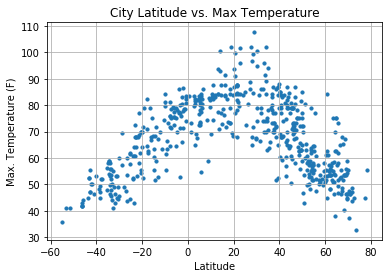

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

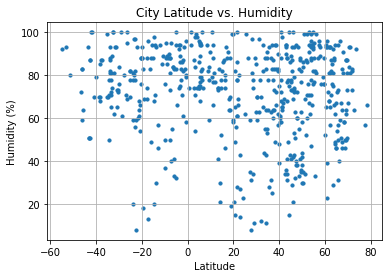

In [19]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

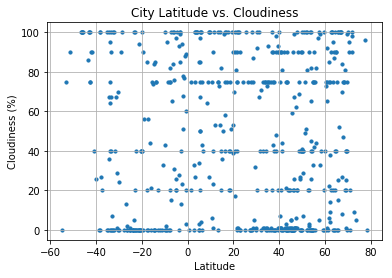

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

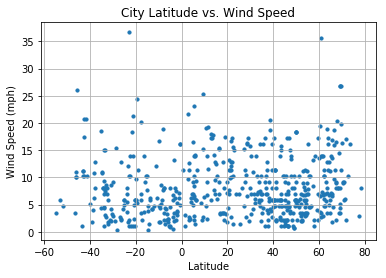

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()